In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
import os
import sys
sys.path.insert(0, '/home/aew492/lss-dipoles')
import tools

#### Ellis & Baldwin dipole approximation for radio source counts
$$
\mathcal{D} = \left[ 2+x(1+\alpha)\right]\frac{v}{c}
$$

$\alpha$ = spectral index

$x$ = number-count slope

$\Longrightarrow$ We want to use this to estimate the expected dipole in different redshift bins in Quaia to understand how dependent the expected dipole is on the redshift evolution of the quasars (motivated by e.g. Dalang & Bonvin 2022 and Guandalin et al. 2022)

In [3]:
def Vega_to_AB(BR_Vega, offset=-0.3250):  # offset computed from Gaia photometric zero points
    return BR_Vega + offset

In [4]:
def compute_alpha(B, R, lambda_B=505.15, lambda_R=772.62):
    """
    Compute the spectral slope alpha for a source with given BP and RP magnitudes.
    PARAMETERS:
    - B = BP magnitude (Vega system)
    - R = RP magnitude (Vega system)
    - lambda_B = wavelength (nm) of blue passband (default is the "pivot wavelength" given by Gaia)
    - lambda_R = wavelength (nm) of red passband (")
    """
    # convert given (B-R)_Vega to AB color (B-R)_AB
    BR_AB = Vega_to_AB(B-R)
    
    alpha = BR_AB/(2.5*np.log10(lambda_R/lambda_B))

    return alpha

#### spectral indices in full sample

In [5]:
# load catalog
G = 20.5
quaia_fn = f'/scratch/aew492/quasars/catalogs/quaia_G{G}.fits'
tab_quaia = Table.read(quaia_fn, format='fits')

In [9]:
bps = tab_quaia['phot_bp_mean_mag']
rps = tab_quaia['phot_rp_mean_mag']

In [10]:
alphas = [
    compute_alpha(bps[i], rps[i]) for i in range(len(tab_quaia))
]

Text(0.5, 1.0, 'Quaia G<20.5 spectral indices')

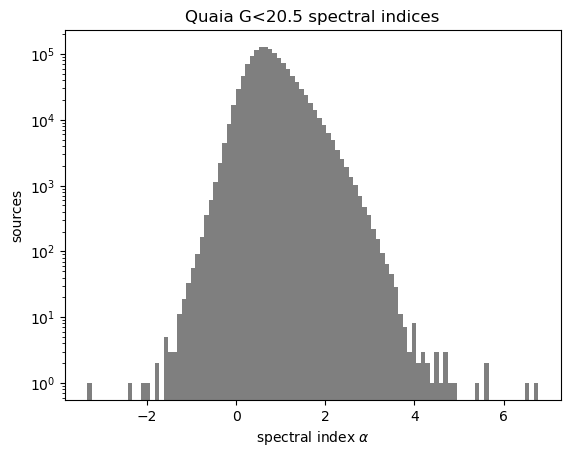

In [11]:
fig, ax = plt.subplots()
n, bins, _ = ax.hist(alphas, bins=100, color='k', alpha=0.5)
ax.set_yscale('log')
ax.set_xlabel(r'spectral index $\alpha$')
ax.set_ylabel('sources')
ax.set_title(f'Quaia G<{G} spectral indices')

In [ ]:
bins[np.argmax(n)]

In [12]:
np.mean(alphas), np.median(alphas)

(0.7737076968903153, 0.708810225034351, 0.36607251534788504)

#### distribution for $|b|>30^\circ$

#### number-count slope